In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [45]:
import seaborn as sns
%reload_ext autoreload
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

font = {'size'   : 14}
plt.rc('font', **font)

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [3]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

In [4]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]

In [58]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    ob_id = np.arange(0,len(data))
    data.insert(0 , 'obs_id' , ob_id)
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>5]
    
    data = data.sample(frac=1)
    #display(data)
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    obs_id = data['obs_id']
    data_val = data.drop(columns=['index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name' , 'obs_id'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)
    data = data.replace(np.nan , 0 )
    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    
    #display(data_val)
    return data , data_val , data_class , data_id , data_sig , obs_id

In [85]:
model = keras.models.load_model('models/NN_NS_BH.mdl/')

(37, 2)


(37, 2)


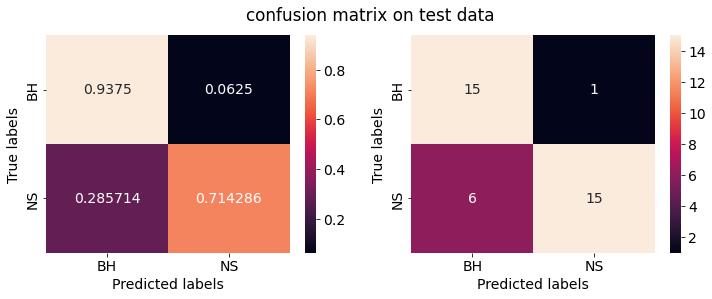

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
15,15,8,1,BH,BH,0.999985,BH0022,CXOU J100517.1-07421,119479.4,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
13,13,6,1,BH,BH,0.999264,BH0022,CXOU J100517.1-07421,158013.8,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
14,14,7,1,BH,BH,0.999659,BH0022,CXOU J100517.1-07421,160215.7,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
7,7,0,1,BH,BH,0.999400,BH0022,CXOU J100517.1-07421,36978.6,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
11,11,4,1,BH,BH,0.999987,BH0022,CXOU J100517.1-07421,75554.3,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
9,9,2,1,BH,BH,0.992745,BH0022,CXOU J100517.1-07421,75682.2,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
12,12,5,1,BH,BH,0.999998,BH0022,CXOU J100517.1-07421,184208.0,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
8,8,1,1,BH,BH,0.999813,BH0022,CXOU J100517.1-07421,40580.4,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
16,16,9,1,BH,BH,0.999933,BH0022,CXOU J100517.1-07421,69689.2,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000
10,10,3,1,BH,BH,0.999942,BH0022,CXOU J100517.1-07421,171955.9,11.12,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.00,0.000


In [71]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
test_ns = pd.read_csv('processed_data/NS_test.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


params_used = []
for t in t_val:
    params_used.append(t)
params_used = np.asarray(params_used)

t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_test.csv')

## Feature Correlation

In [93]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef_BH' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef_BH' , axis = 0)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_test.csv')

,feat,corr_coef_BH
36,hard_hm_hilim,0.006286
33,brems_kt,0.008520
44,powlaw_gamma_hilim,0.010070
17,hard_hm,0.010649
21,powlaw_gamma,0.012255
...,...,...
61,bb_nh_lolim,0.178637
12,flux_aper_lolim,0.219529
14,photflux_aper_hilim,0.280107
13,flux_aper,0.290278


(363, 2)


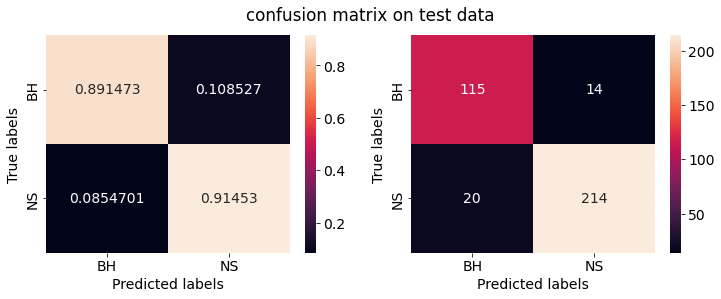

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,2,1,BH,BH,0.761943,BH0001,1A 0620-00,29673.9,23.63,...,13.083178,13.013990,4.313,2.799,17.89,8.830,0.6263,0.5576,0.8602,0.00
0,0,0,1,BH,BH,0.504784,BH0001,1A 0620-00,41932.7,23.63,...,0.000000,0.000000,0.000,0.000,0.00,0.000,0.0000,0.0000,0.0000,0.00
1,1,1,1,BH,BH,0.889803,BH0001,1A 0620-00,39623.0,23.63,...,13.433798,13.353400,3.134,2.000,15.48,6.992,0.5002,0.4332,1.0350,0.00
5,5,2,0,BH,NS,0.965223,BH0003,GINGA 1354-645,19803.6,20.86,...,0.000000,0.000000,0.000,0.000,0.00,0.000,0.0000,0.0000,0.0000,0.00
3,3,0,1,BH,BH,0.902311,BH0003,GINGA 1354-645,39516.5,20.86,...,13.372737,13.236872,5.139,2.614,76.58,54.170,0.7901,0.6270,35.2000,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,618,1,0,NS,BH,0.633564,NS0077,1WGA J1747.4-3002,30547.7,17.15,...,13.236497,13.056456,23.470,3.287,87.67,40.630,1.0230,0.7393,29.8900,0.00
430,617,0,1,NS,NS,0.917696,NS0077,1WGA J1747.4-3002,29715.4,17.15,...,13.218245,13.056407,35.720,4.278,104.70,51.100,1.1420,0.8692,32.2900,0.00
436,623,0,1,NS,NS,0.780418,NS0083,E2259+587,24783.0,114.17,...,11.891435,11.875170,1.525,1.411,88.92,83.260,0.5262,0.5079,49.7400,44.93
437,624,0,1,NS,NS,0.998205,NS0084,GRO J1744-28,10619.0,5.50,...,0.000000,0.000000,0.000,0.000,0.00,0.000,0.0000,0.0000,0.0000,0.00


In [90]:
test_bh = pd.read_csv('processed_data/BH_train.csv')
test_ns = pd.read_csv('processed_data/NS_train.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_train.csv')

In [92]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef_BH' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef_BH' , axis = 0)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_train.csv')

,feat,corr_coef_BH
36,hard_hm_hilim,0.006286
33,brems_kt,0.008520
44,powlaw_gamma_hilim,0.010070
17,hard_hm,0.010649
21,powlaw_gamma,0.012255
...,...,...
61,bb_nh_lolim,0.178637
12,flux_aper_lolim,0.219529
14,photflux_aper_hilim,0.280107
13,flux_aper,0.290278
